# Linear Regression From Scratch

## Probabilistic Interpretation

$P(y|x) = \prod_{j=1}^{J} \mathcal{N}(y_j \mid w_j^T x, \sigma_j^2)$

where $y \in \mathbb{R}^{J}$, $x \in \mathbb{R}^{D}$

1. J = 1, D = 1: $P(y|x) = \mathcal{N}(y \mid w x, \sigma^2)$ &nbsp;&nbsp;&nbsp;&nbsp;(Simple Linear Regression)
2. J = 1, D > 1: $P(y|x) = \mathcal{N}(y \mid w^T x, \sigma^2)$ &nbsp;&nbsp;&nbsp;&nbsp;(Multiple Linear Regression)
3. J > 1, D > 1: $P(y|x) = \prod_{j=1}^{J} \mathcal{N}(y_j \mid w_j^T x, \sigma_j^2)$ &nbsp;&nbsp;&nbsp;&nbsp;(Multi-variate Linear Regression)

## Geometric Interpretation

Given $N$ data points $\{(x_i, y_i)\}_{i=1}^N$ with $x_i \in \mathbb{R}^D$, $y_i \in \mathbb{R}^J$:

- Model: $y_i = W^T x_i + c$ 

- where $W \in \mathbb{R}^{D \times J}$, $c \in \mathbb{R}^J$

- In matrix form: $Y = XW + C$
- where $Y \in \mathbb{R}^{N \times J}$, $X \in \mathbb{R}^{N \times D}$, $C \in \mathbb{R}^{N \times J}$

## Closed Form Solution

The closed-form solution (Normal Equation):

$$
W = (X^T X)^{-1} X^T Y
$$

where $X$ is the $N \times D$ data matrix, $Y$ is the $N \times J$ target matrix, and $W$ is the $D \times J$ weight matrix. This formulation covers simple, multiple, and multi-variate linear regression.


For large D, matrix inversion expensive or unstable (nearly singular ie determinant close to 0 ,thus small changes in data can cause large swings in W)

In practice, gradient descent is used.


Cons of Linear Regression:
- Not truly Bayesion (no prior)
- No control on Overfitting
- Correlated inputs give unstable results
- Susceptible to unncessary attributes, gets 'confused'
- Not Robust to Outliers

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)

# Generate some random data for linear regression
N = 1000
D = 10

X = np.random.rand(N, D) # N x D
W = np.random.rand(D,1)  # D x 1

C = np.random.rand(N,1) * 0.1 # N x 1, bias term


Y = X @ W + C

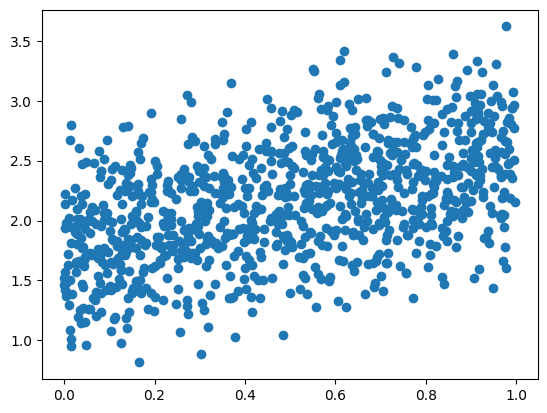

In [5]:
# plot true data
plt.scatter(X[:,0], Y)

# Multiple Linear Regression

In [6]:
X_train = X[:800, :]
Y_train = Y[:800, :]

X_test = X[800:, :]
Y_test = Y[800:, :]

## Closed Form Solution

In [7]:
X_in = np.hstack([np.ones((800, 1)), X_train])

W_out = np.linalg.inv(X_in.T @ X_in) @ (X_in.T @ Y_train)

Mean Squared Error:  0.0008067578179813561
R^2 Score:  0.9966270196094984


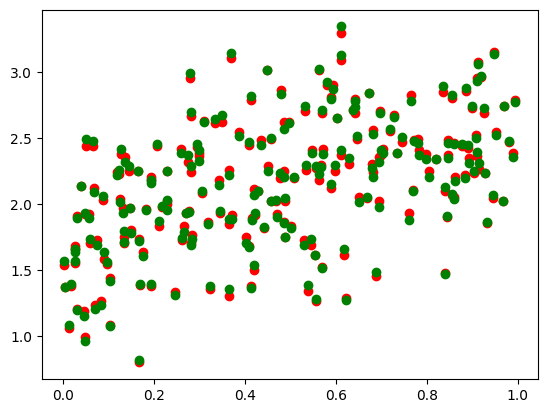

In [8]:
# predicted outputs
Y_pred = np.hstack([np.ones((200, 1)), X_test]) @ W_out

# plot predicted data
plt.scatter(X_test[:,0], Y_pred, color='r')
plt.scatter(X_test[:,0], Y_test, color='g')

# compute mean squared error
mse = np.mean((Y_pred - Y_test)**2)
print("Mean Squared Error: ", mse)


# compute R^2 score
ss_total = np.sum((Y_test - np.mean(Y_test))**2)
ss_res = np.sum((Y_test - Y_pred)**2)
r2_score = 1 - (ss_res / ss_total)
print("R^2 Score: ", r2_score)

Pretty Good! 

## Gradient Descent

R^2 Score (Gradient Descent):  0.9953470276428248
Mean Squared Error (Gradient Descent):  0.0011129094721609178


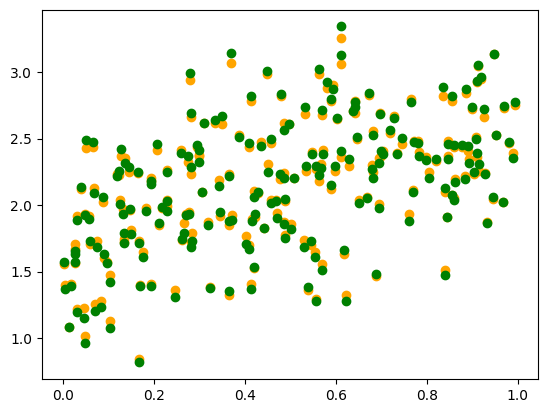

In [9]:
# Gradient Descent
num_iterations = 10000
learning_rate = 0.01

W_learn = np.random.rand(D+1, 1) * 0.01  # D+1 x 1

X_train_ = np.hstack([np.ones((800, 1)), X_train])
X_test_ = np.hstack([np.ones((200, 1)), X_test])

for _ in range(num_iterations):
    # forward pass
    Y_pred = X_train_ @ W_learn  # N x 1
    error = Y_pred - Y_train  # N x 1
    gradient = (X_train_.T @ error) / N  # D+1 x 1
    W_learn -= learning_rate * gradient  # D+1 x 1

# predicted output
Y_test_pred = X_test_ @ W_learn

# compute R^2 score
ss_total = np.sum((Y_test - np.mean(Y_test))**2)
ss_res = np.sum((Y_test - Y_test_pred)**2)
r2_score = 1 - (ss_res / ss_total)
print("R^2 Score (Gradient Descent): ", r2_score)     

# compute mean squared error
mse = np.mean((Y_test_pred - Y_test)**2)
print("Mean Squared Error (Gradient Descent): ", mse)


# plot predicted data
plt.scatter(X_test[:,0], Y_test_pred, color='orange')
plt.scatter(X_test[:,0], Y_test, color='g')



### Linear Regression using einsum

In [17]:
# Gradient Descent
num_iterations = 10000
learning_rate = 0.01

W_learn = np.random.rand(D+1, 1) * 0.01  # D+1 x 1

X_train_ = np.hstack([np.ones((800, 1)), X_train]) # Shape: (N1, D + 1)
X_test_ = np.hstack([np.ones((200, 1)), X_test]) # Shape(N2, D + 1)
N1 = X_train_.shape[0]

for _ in range(num_iterations):
    Y_hat = np.einsum("nd, dc -> nc", X_train_, W_learn) # (N1, 1)
    error = Y_hat - Y_train # (N1, 1)
    grad = np.einsum("nc, nd -> dc", error, X_train_) / N1

    W_learn -= grad * learning_rate